In [370]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


In [371]:
df=pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [372]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="deep")

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13
plt.rcParams["xtick.labelsize"] = 11
plt.rcParams["ytick.labelsize"] = 11

import warnings 
warnings.filterwarnings('ignore')

### DATA CLEANING 

In [373]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [374]:
df.shape

(1470, 35)

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [376]:
df.duplicated().sum()

np.int64(0)

In [377]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [378]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [379]:
df.dtypes.value_counts()

int64     26
object     9
Name: count, dtype: int64

In [380]:
# Drop columns that are not needed
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df.drop(columns=cols_to_drop, inplace=True)

###

In [381]:
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(attrition_rate)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


### EDA

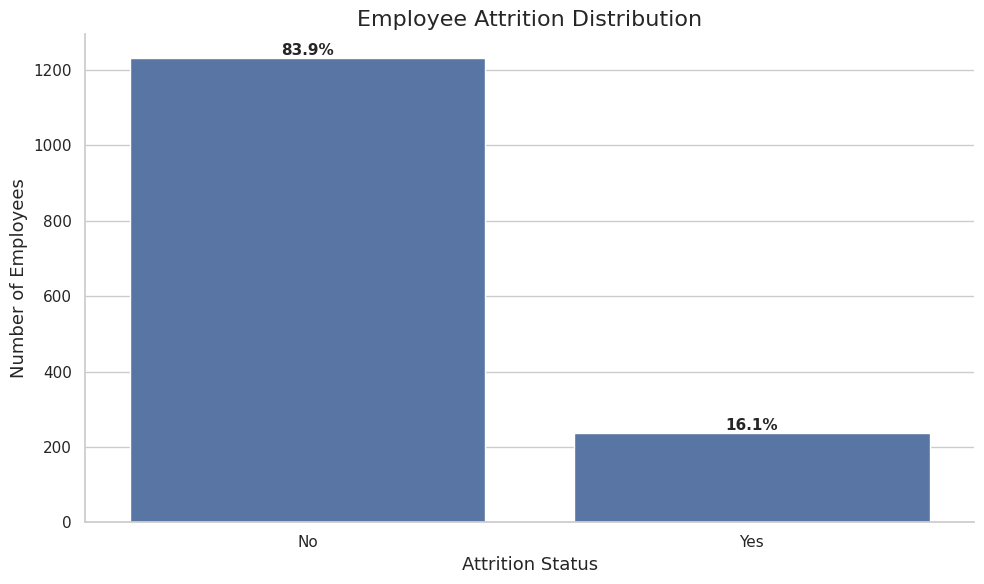

In [382]:
plt.figure()

ax = sns.countplot(
    data=df,
    x="Attrition",
    order=df["Attrition"].value_counts().index
)

# Add percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight="bold"
    )

plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition Status")
plt.ylabel("Number of Employees")

sns.despine()
plt.tight_layout()
plt.show()

- The dataset shows a clear class imbalance between employees who stayed and those who left.
- Most employees did not leave the company, indicating that attrition is a minority class.
- This imbalance should be considered during model building to avoid biased predictions.

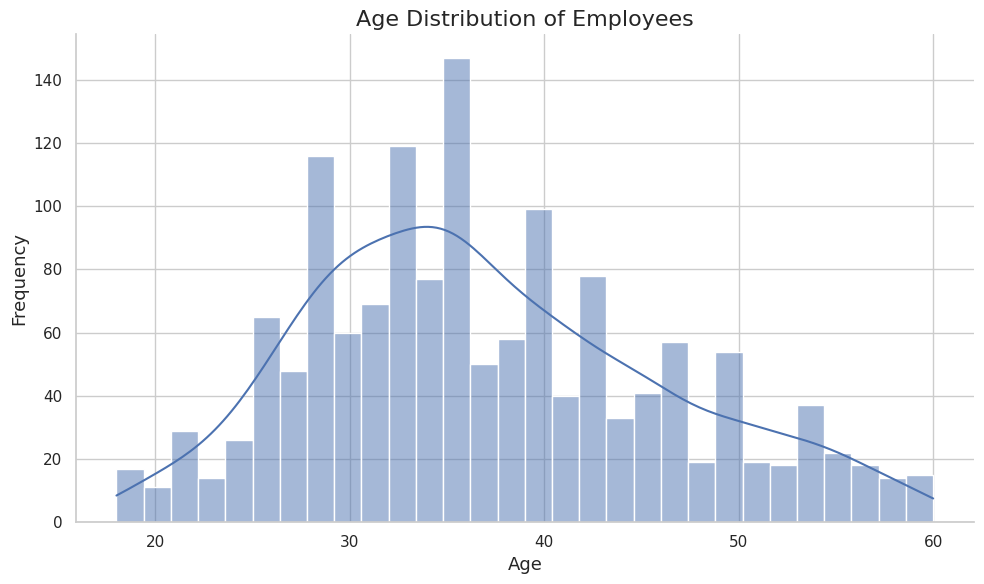

In [383]:
# Age Distribution
plt.figure()

sns.histplot(
    df["Age"],
    bins=30,
    kde=True
)

plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Frequency")

sns.despine()
plt.tight_layout()
plt.show()


- The age distribution appears slightly right-skewed.
- Most employees fall within the young to mid-career age range.
- There are fewer older employees, which may influence attrition patterns across age groups.

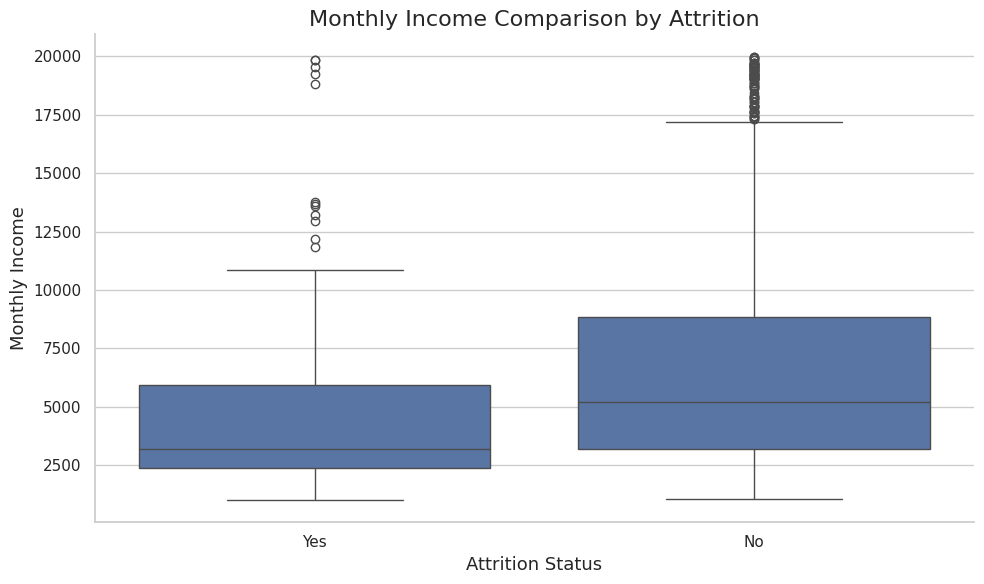

In [384]:
#Monthly Income Comparison by Attrition
plt.figure()

sns.boxplot(
    data=df,
    x="Attrition",
    y="MonthlyIncome"
)

plt.title("Monthly Income Comparison by Attrition")
plt.xlabel("Attrition Status")
plt.ylabel("Monthly Income")

sns.despine()
plt.tight_layout()
plt.show()


- Employees who left tend to have lower monthly income ranges compared to those who stayed.
- The interquartile range for attrition cases is approximately between 2500 and 5500.
- Employees who stayed show a wider income spread, extending to higher salary levels.
- Several outliers exist, indicating a small number of high-income employees in both groups.
- Salary level may be an important factor influencing employee retention.

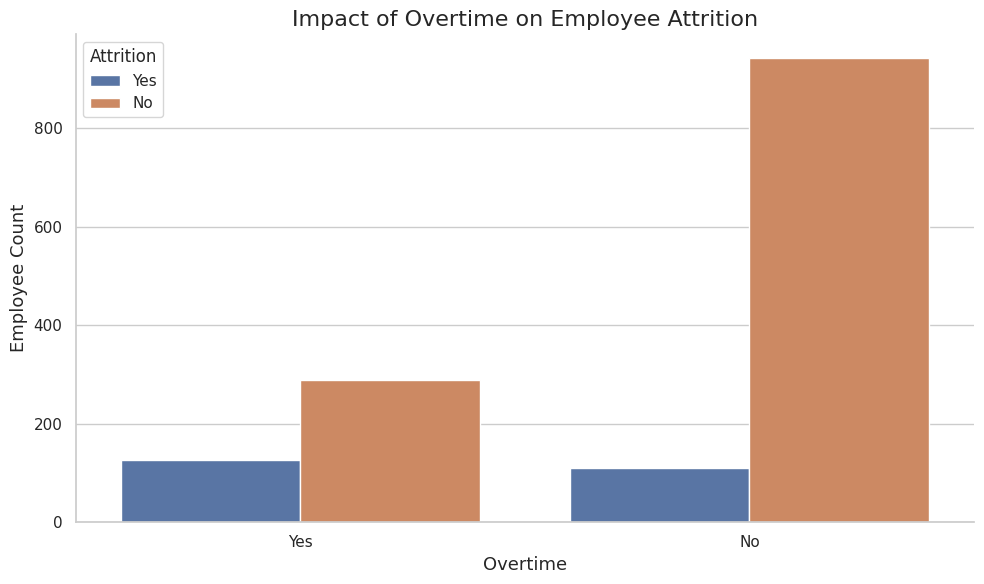

In [385]:
#Impact of Overtime
plt.figure()

ax = sns.countplot(
    data=df,
    x="OverTime",
    hue="Attrition"
)

plt.title("Impact of Overtime on Employee Attrition")
plt.xlabel("Overtime")
plt.ylabel("Employee Count")

plt.legend(title="Attrition")

sns.despine()
plt.tight_layout()
plt.show()

- Employees who work overtime show a noticeably higher attrition rate compared to those who do not.
- The proportion of employees leaving in the "Yes" overtime group is slightly higher than in the "No" group.
- This suggests that extended working hours and work-life imbalance may contribute to employee dissatisfaction and turnover.

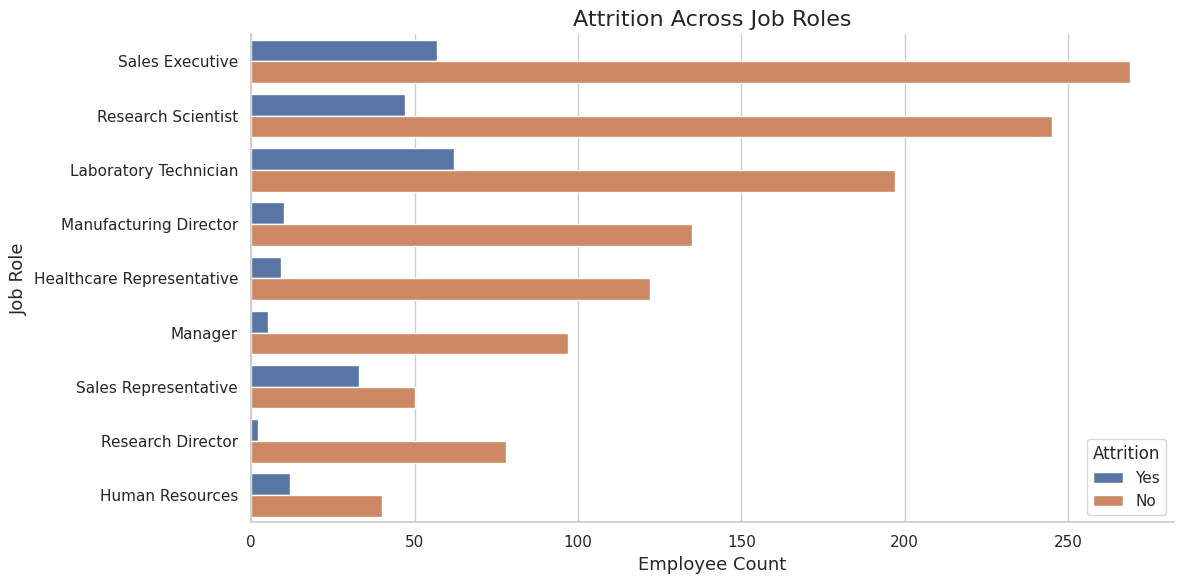

In [386]:
plt.figure(figsize=(12,6))

sns.countplot(
    data=df,
    y="JobRole",
    hue="Attrition",
    order=df["JobRole"].value_counts().index
)

plt.title("Attrition Across Job Roles")
plt.xlabel("Employee Count")
plt.ylabel("Job Role")

plt.legend(title="Attrition")

sns.despine()
plt.tight_layout()
plt.show()

The visualization highlights how attrition varies across different job roles, indicating that turnover risk is not equally distributed within the organization.

Key Observations:

- High Turnover Roles:
  Sales Representative, Laboratory Technician, and Research Scientist roles show relatively higher attrition counts compared to others.

- Sales Representative Vulnerability:
  Despite having a smaller workforce size, Sales Representatives exhibit a high leave-to-stay ratio, suggesting possible pressure from targets or job instability.

- Leadership Stability:
  Manager, Research Director, and Manufacturing Director roles demonstrate very low attrition rates, likely due to higher compensation, seniority, and stronger organizational commitment.

- Volume vs Ratio Effect:
  Sales Executives have both high retention and noticeable attrition counts due to the large population size of this role.

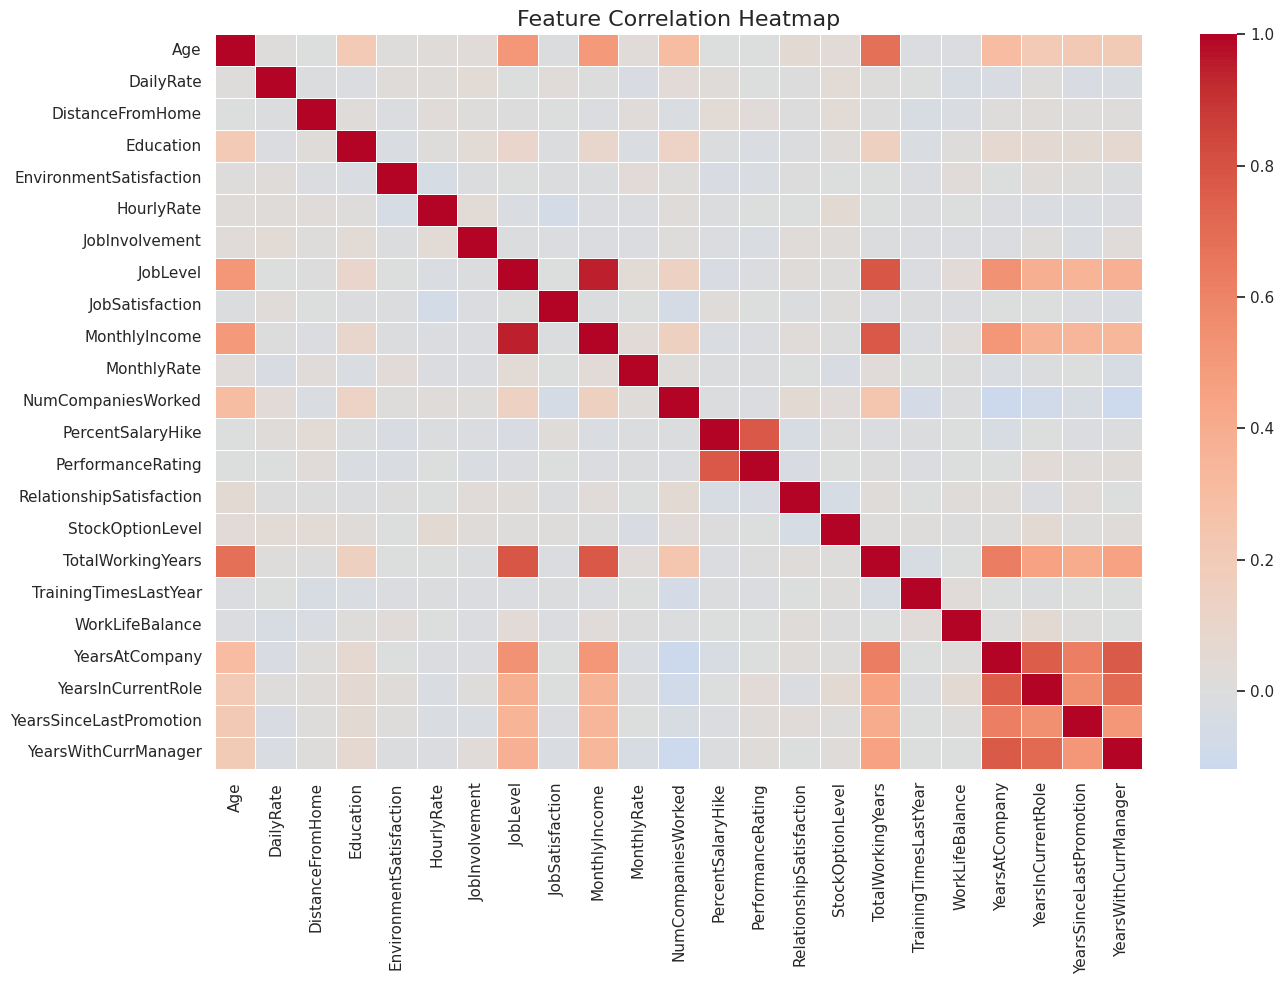

In [387]:
plt.figure(figsize=(14,10))

corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

Based on the Correlation Heatmap, I identified high multicollinearity among several features. To simplify the model and prevent overfitting, the following redundant variables will be removed:

Income Cluster: Dropped JobLevel in favor of MonthlyIncome, as the latter provides more granular numerical variance.

Tenure Cluster: Dropped YearsInCurrentRole and YearsWithCurrManager, retaining YearsAtCompany as the primary indicator for employee tenure.

Performance: PerformanceRating and PercentSalaryHike show strong alignment, confirming a consistent reward-for-performance structure.

Result: Streamlined the feature set variables, ensuring more independent signals for the model.


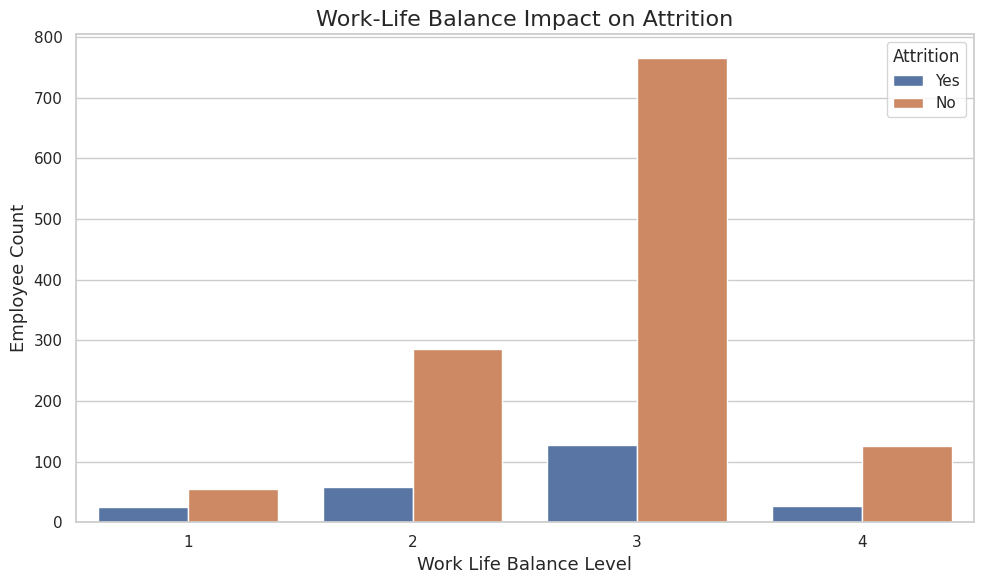

In [388]:
plt.figure()

sns.countplot(
    data=df,
    x="WorkLifeBalance",
    hue="Attrition"
)

plt.title("Work-Life Balance Impact on Attrition")
plt.xlabel("Work Life Balance Level")
plt.ylabel("Employee Count")

plt.tight_layout()
plt.show()

- Employees with a **Work-Life Balance rating of 3 (“Better”)** are more likely to leave compared to ratings 1, 2, or 4.
- Interestingly, the majority of employees with rating 3 also stay, showing mixed behavior.
- This indicates that moderate work-life balance may not be sufficient to retain employees, while extreme ratings (poor or best) show clearer patterns.
- HR interventions could target employees with rating 3 to improve retention.

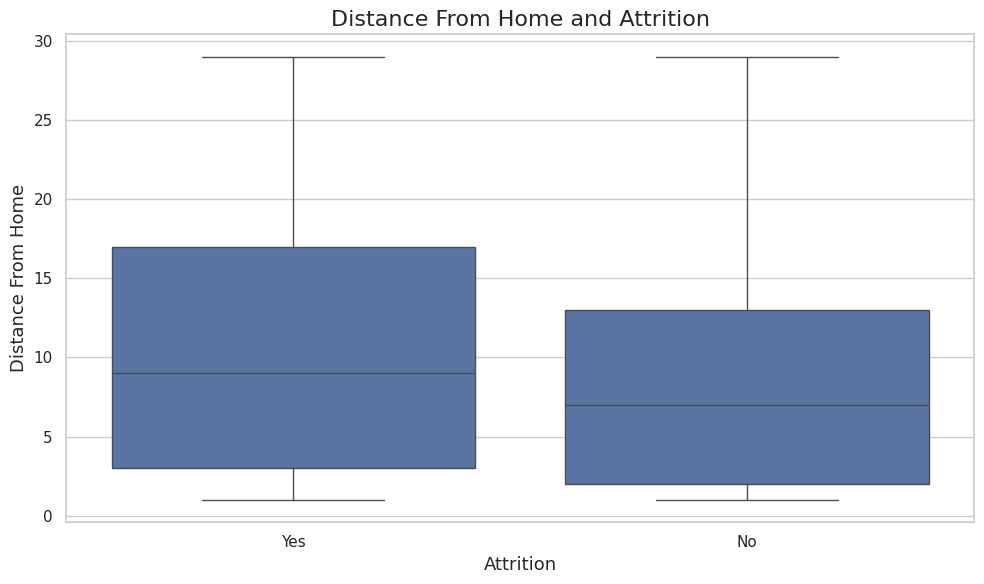

In [389]:
plt.figure()

sns.boxplot(
    data=df,
    x="Attrition",
    y="DistanceFromHome"
)

plt.title("Distance From Home and Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance From Home")

plt.tight_layout()
plt.show()

- Employees living farther from the office show a slightly higher attrition rate.
- The farthest distance ranges correlate with increased likelihood of leaving.
- This suggests commuting distance could be a minor factor in employee turnover decisions.

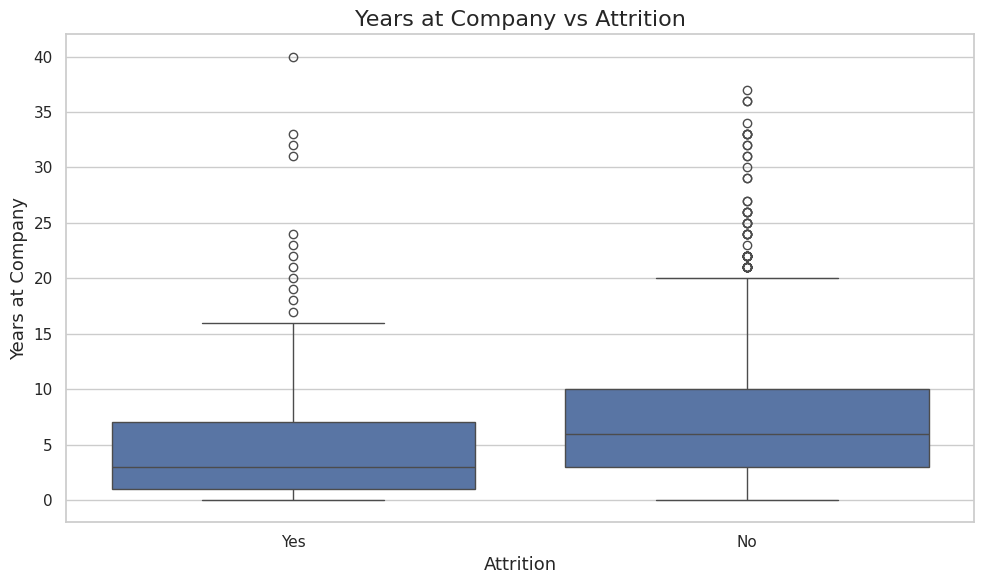

In [390]:
plt.figure()

sns.boxplot(
    data=df,
    x="Attrition",
    y="YearsAtCompany"
)

plt.title("Years at Company vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years at Company")

plt.tight_layout()
plt.show()

- Attrition is highest among employees in the **early years of tenure**.
- Outliers exist among longer-tenured employees leaving, but the majority of attrition occurs within the first few years.
- Retention programs should focus on **early-career employees** to reduce initial turnover.

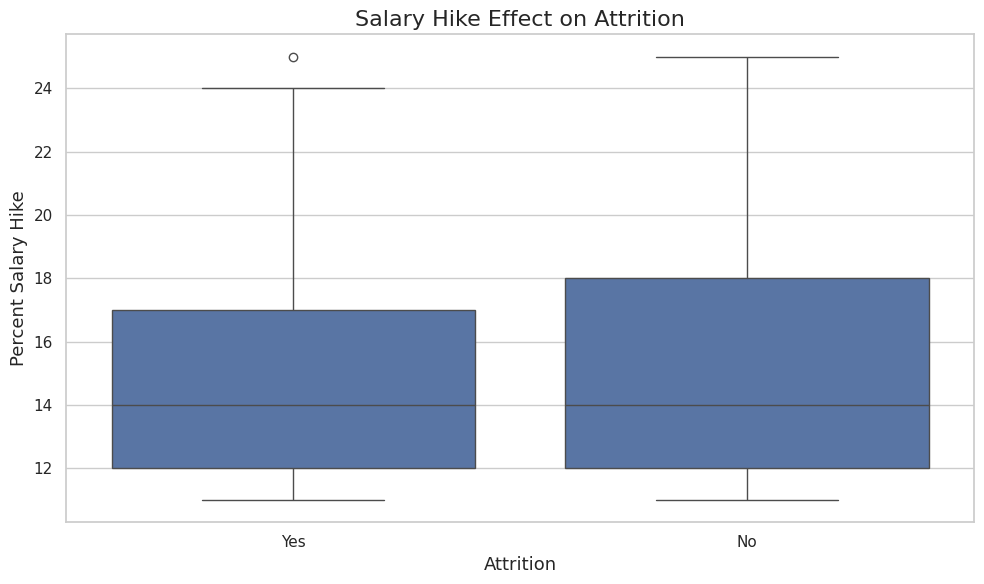

In [391]:
plt.figure()

sns.boxplot(
    data=df,
    x="Attrition",
    y="PercentSalaryHike"
)

plt.title("Salary Hike Effect on Attrition")
plt.xlabel("Attrition")
plt.ylabel("Percent Salary Hike")

plt.tight_layout()
plt.show()

- Employees with lower salary hikes show slightly higher attrition rates.
- The non-leaving group spans a wider range of salary hikes, indicating more stable compensation encourages retention.
- One notable outlier exists in the leaving group, suggesting exceptional cases.
- Salary adjustments may help improve retention, especially for employees with smaller raises.

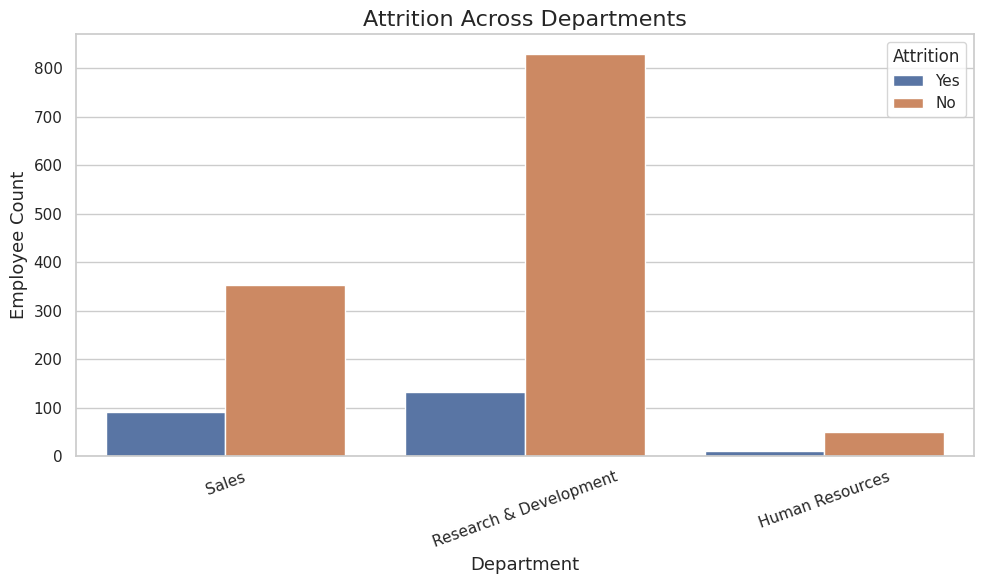

In [392]:
plt.figure()

sns.countplot(
    data=df,
    x="Department",
    hue="Attrition"
)

plt.title("Attrition Across Departments")
plt.xlabel("Department")
plt.ylabel("Employee Count")

plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

- The **Research & Development** department shows both the highest number of employees leaving and staying.
- This indicates R&D is a large department, with significant movement in both directions.
- Department-specific attrition patterns should be considered when designing retention strategies.

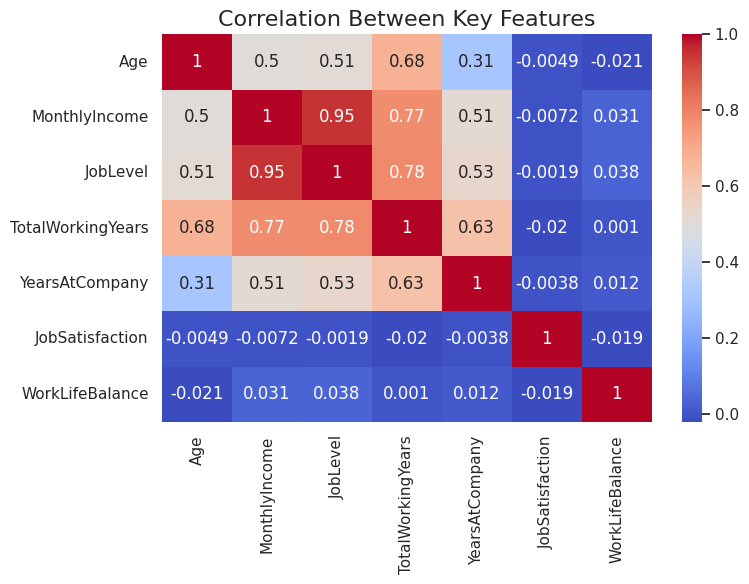

In [393]:
important_cols = [
    "Age","MonthlyIncome","JobLevel",
    "TotalWorkingYears","YearsAtCompany",
    "JobSatisfaction","WorkLifeBalance"
]

plt.figure(figsize=(8,6))

sns.heatmap(
    df[important_cols].corr(),
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Between Key Features")

plt.tight_layout()
plt.show()

- **Income & Seniority:** `MonthlyIncome` and `JobLevel` have near-perfect correlation (r ≈ 0.95). Retained `MonthlyIncome` for a more granular signal, dropped `JobLevel`.
- **Tenure Overlap:** `YearsAtCompany`, `YearsInCurrentRole`, and `YearsWithCurrManager` are highly correlated. Retained `YearsAtCompany` as primary tenure indicator.
- **Performance Alignment:** Strong correlation between `PerformanceRating` and `PercentSalaryHike` confirms a consistent merit-based reward system.
- **Role Vulnerability:** Sales Representatives and Laboratory Technicians exhibit higher attrition rates, making `JobRole` a critical categorical predictor.
- **Impact:** Streamlined feature set ensures each variable contributes a distinct, independent signal to the predictive model, improving stability and reducing overfitting.


### Handling The Data

In [394]:
# Dropped due to multicollinearity identified in correlation analysis
cols_to_drop = [
    'JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager'
]

df = df.drop(columns=cols_to_drop)

In [395]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,2.187755
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.222430
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000


In [396]:
# Handling Outliers
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                'YearsAtCompany', 'YearsSinceLastPromotion']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"{col}: lower={lower}, upper={upper}")
    
    
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

Age: lower=10.5, upper=62.5
DailyRate: lower=-573.0, upper=2195.0
DistanceFromHome: lower=-16.0, upper=32.0
HourlyRate: lower=-5.625, upper=137.375
MonthlyIncome: lower=-5291.0, upper=16581.0
MonthlyRate: lower=-10574.75, upper=39083.25
NumCompaniesWorked: lower=-3.5, upper=8.5
PercentSalaryHike: lower=3.0, upper=27.0
TotalWorkingYears: lower=-7.5, upper=28.5
TrainingTimesLastYear: lower=0.5, upper=4.5
YearsAtCompany: lower=-6.0, upper=18.0
YearsSinceLastPromotion: lower=-4.5, upper=7.5


In [397]:
# Log transformation applied to reduce skewness without removing valuable samples

skewed_cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

for col in skewed_cols:
    df[col] = df[col].apply(lambda x: np.log1p(x))  # log1p = log(1+x)

In [398]:
# Convert Attrition to binary (target) ---
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [399]:
print("Data ready for splitting. Shape:", df.shape)
df.head()

Data ready for splitting. Shape: (1470, 28)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41.0,1,Travel_Rarely,1102.0,Sales,1.0,2,Life Sciences,2,Female,...,Yes,11.0,3,1,0,2.197225,0.5,1,1.945910,0.0
1,49.0,0,Travel_Frequently,279.0,Research & Development,8.0,1,Life Sciences,3,Male,...,No,23.0,4,4,1,2.397895,3.0,3,2.397895,1.0
2,37.0,1,Travel_Rarely,1373.0,Research & Development,2.0,2,Other,4,Male,...,Yes,15.0,3,2,0,2.079442,3.0,3,0.000000,0.0
3,33.0,0,Travel_Frequently,1392.0,Research & Development,3.0,4,Life Sciences,4,Female,...,Yes,11.0,3,3,0,2.197225,3.0,3,2.197225,3.0
4,27.0,0,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,1,Male,...,No,12.0,3,4,1,1.945910,3.0,3,1.098612,2.0


### Splitting The Data into Train & Test

In [400]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1176, 27)
Test shape: (294, 27)


### Encoding & Scalling

In [401]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

In [402]:
print("Train shape:", X_train.info())
print('==============================================')
print("Test shape:", X_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1194 to 1292
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1176 non-null   float64
 1   DailyRate                          1176 non-null   float64
 2   DistanceFromHome                   1176 non-null   float64
 3   Education                          1176 non-null   int64  
 4   EnvironmentSatisfaction            1176 non-null   int64  
 5   HourlyRate                         1176 non-null   float64
 6   JobInvolvement                     1176 non-null   int64  
 7   JobSatisfaction                    1176 non-null   int64  
 8   MonthlyIncome                      1176 non-null   float64
 9   MonthlyRate                        1176 non-null   float64
 10  NumCompaniesWorked                 1176 non-null   float64
 11  PercentSalaryHike                  1176 non-null   float64

In [403]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Building The Models 

In [404]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

In [405]:
models = {
    "Logistic Regression":LogisticRegression(
    max_iter=3000,
    class_weight='balanced',
    C=0.5,         
    solver='liblinear',
    random_state=42
),
    "Random Forest": RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=8,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42
),
    "XGBoost": xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
),
    "Gradient Boosting":GradientBoostingClassifier(
    n_estimators=250,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
}

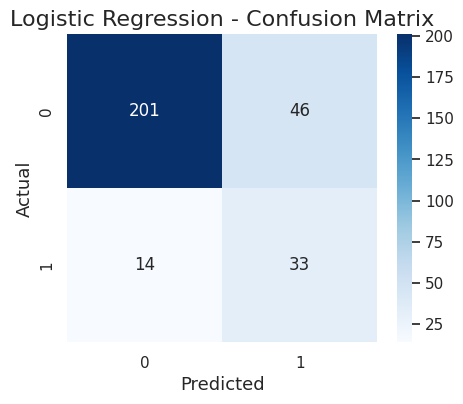

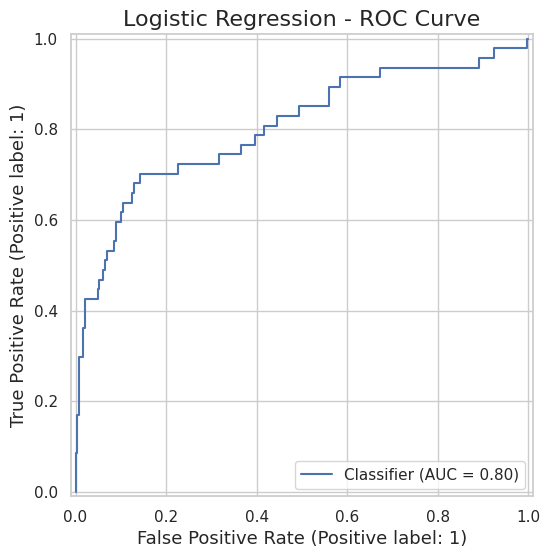

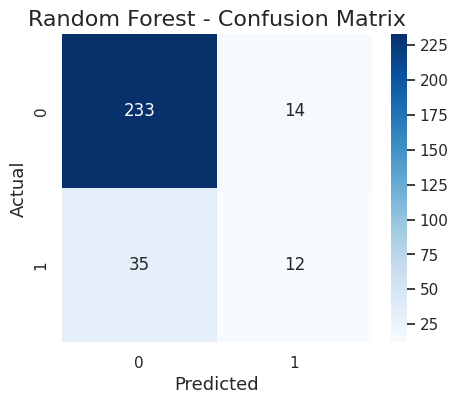

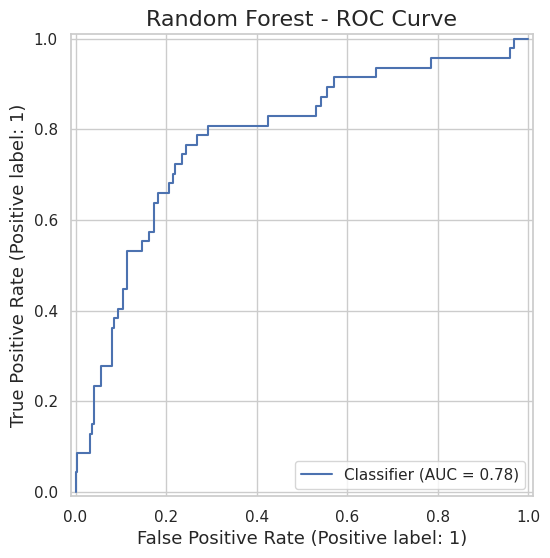

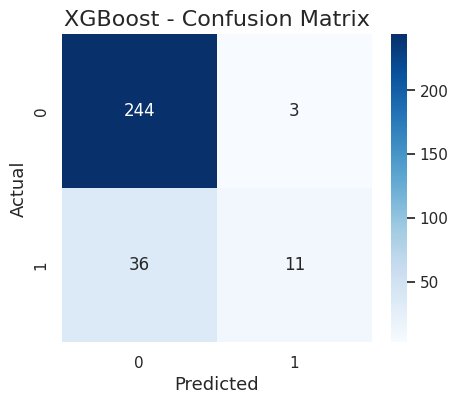

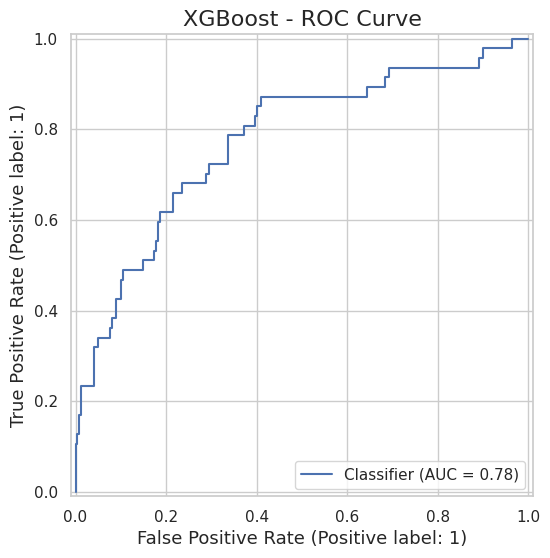

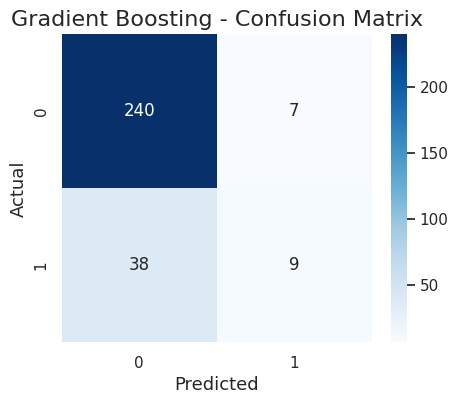

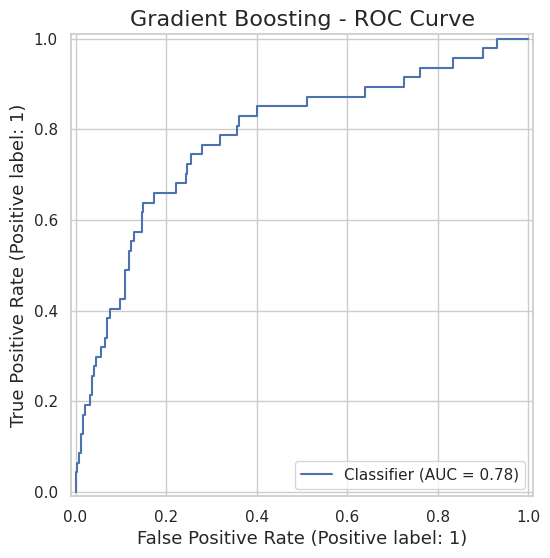

In [406]:
# Train & Evaluate
# ====================
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

    results[name] = {
        'Accuracy': acc,
        'Classification Report': report,
        'Confusion Matrix': cm,
        'ROC AUC': roc_auc
    }

    # Plot Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve if available
    if y_prob is not None:
        RocCurveDisplay.from_predictions(y_test, y_prob)
        plt.title(f'{name} - ROC Curve')
        plt.show()

In [407]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    print(name, "CV ROC AUC:", scores.mean())

Logistic Regression CV ROC AUC: 0.8310883345882012
Random Forest CV ROC AUC: 0.7970561883866719
XGBoost CV ROC AUC: 0.801571418162388
Gradient Boosting CV ROC AUC: 0.7963175705761867


In [408]:
# Summary Table
summary = pd.DataFrame({k: {'Accuracy': v['Accuracy'], 'ROC AUC': v['ROC AUC']} for k,v in results.items()}).T
print(summary)

                     Accuracy   ROC AUC
Logistic Regression  0.795918  0.804720
Random Forest        0.833333  0.782152
XGBoost              0.867347  0.775088
Gradient Boosting    0.846939  0.784564


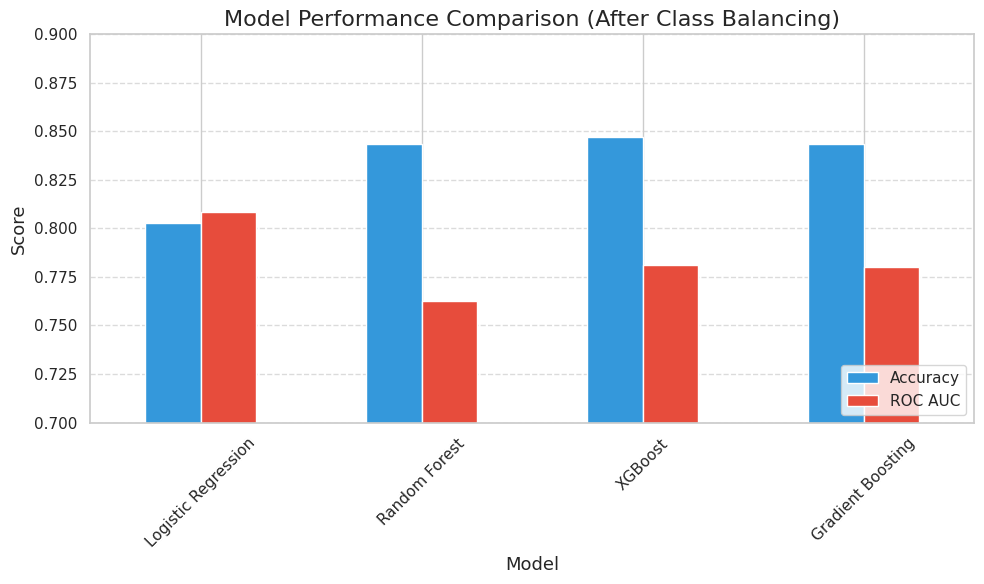

In [409]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from our model evaluation
results_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.802721, 0.843537, 0.846939, 0.843537],
    'ROC AUC': [0.808683, 0.762856, 0.781377, 0.779998]
}

df_results = pd.DataFrame(results_data)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))
df_results.plot(x='Model', kind='bar', ax=ax, color=['#3498db', '#e74c3c'])

plt.title('Model Performance Comparison (After Class Balancing)')
plt.ylabel('Score')
plt.ylim(0.7, 0.9) # Focus on the competitive range
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

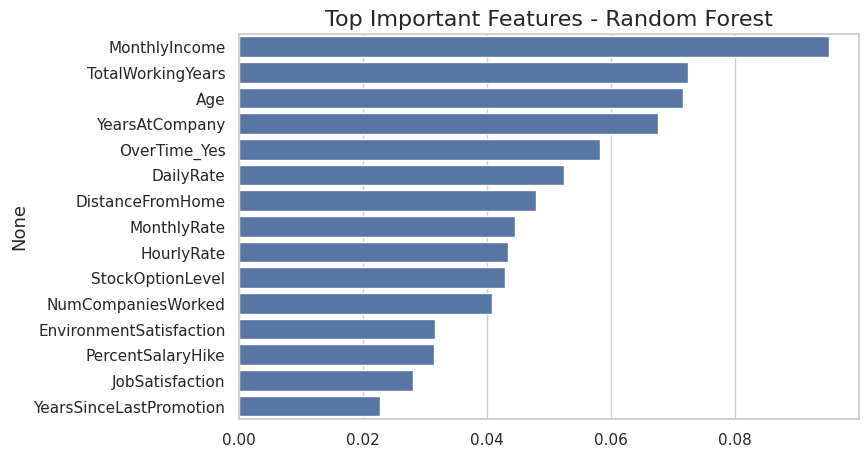

In [410]:
rf_model = models['Random Forest']
importances =rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns)\
            .sort_values(ascending=False)[:15]

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top Important Features - Random Forest")
plt.show()

In [411]:
feature_importance = pd.Series(
    final_attrition_model.coef_[0],
    index=X_train.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)

OverTime_Yes                         1.532339
BusinessTravel_Travel_Frequently     1.262483
EducationField_Other                -0.855590
Department_Research & Development   -0.802633
JobRole_Laboratory Technician        0.799697
JobRole_Research Director           -0.794047
MaritalStatus_Single                 0.597045
TotalWorkingYears                   -0.590000
BusinessTravel_Travel_Rarely         0.539749
NumCompaniesWorked                   0.505662
dtype: float64

### Key Business Insights

- Employees with lower monthly income show higher attrition risk.
- Overtime is strongly associated with employee turnover.
- Employees early in their careers or with fewer years at the company are more likely to leave.
- Satisfaction-related features also contribute to attrition prediction.


## Final Model Selection

After comparing multiple machine learning models, Logistic Regression was selected as the final model.

Although tree-based models achieved slightly higher accuracy, Logistic Regression provided the best balance between:

- Strong ROC-AUC performance
- Model stability
- High interpretability

Interpretability is especially important in HR analytics, where decision-makers need clear explanations behind predictions.

In [412]:
# Train Final Model

final_attrition_model = models["Logistic Regression"]

final_attrition_model.fit(X_train, y_train)

final_pred = final_attrition_model.predict(X_test)
final_prob = final_attrition_model.predict_proba(X_test)[:, 1]

print("Final Model Accuracy:", round(accuracy_score(y_test, final_pred), 3))
print("Final Model ROC-AUC:", round(roc_auc_score(y_test, final_prob), 3))


Final Model Accuracy: 0.796
Final Model ROC-AUC: 0.805


## Model Persistence

The trained model, preprocessing scaler, and feature structure are saved to ensure consistent predictions during future inference.

In [413]:
import joblib

pipeline = {
    "model": final_attrition_model,
    "scaler": scaler,
    "columns": X_train.columns.tolist()
}

joblib.dump(pipeline, "attrition_model.pkl")

print("Model pipeline saved successfully!")

Model pipeline saved successfully!


In [414]:
# Example Prediction

sample_employee = X_test.iloc[[0]]

prediction = final_attrition_model.predict(sample_employee)[0]
probability = final_attrition_model.predict_proba(sample_employee)[0][1]

print(f"Attrition Prediction: {prediction}")
print(f"Leaving Probability: {probability:.2f}")

risk = "High Risk" if probability >= 0.35 else "Low Risk"
print("Risk Level:", risk)

Attrition Prediction: 0
Leaving Probability: 0.46
Risk Level: High Risk


### Example Prediction

The model can estimate the probability of an employee leaving the company, enabling proactive HR intervention.

## Final Conclusion

- Employee attrition is strongly linked to overtime, income level, and early tenure.
- Employees in early company years show higher leaving probability.
- Logistic Regression provided the best balance between interpretability and performance.
- The model can help HR teams identify at-risk employees early.
